<h1>Comparisons Masks and Boolean logic</h1>

In [1]:
# Masking comes up when you extract, modify, count or otherwise manipulate values in an 
# array based on some criterion
# In NumPy boolean masking is the most efficient way to accomplish tasks

<h3>Counting Rainy Days</h3>

In [2]:
# Imagine you have a series of data that represents the amount of precipitation for each day for a given year
# in a given city
import numpy as np
import pandas as pd

In [7]:
# Use pandas to extract rainfall inches as a Numpy array
rainfall = pd.read_csv("Seattle2014.csv")["PRCP"].values
print(rainfall)

[  0  41  15   0   0   3 122  97  58  43 213  15   0   0   0   0   0   0
   0   0   0   5   0   0   0   0   0  89 216   0  23  20   0   0   0   0
   0   0  51   5 183 170  46  18  94 117 264 145 152  10  30  28  25  61
 130   3   0   0   0   5 191 107 165 467  30   0 323  43 188   0   0   5
  69  81 277   3   0   5   0   0   0   0   0  41  36   3 221 140   0   0
   0   0  25   0  46   0   0  46   0   0   0   0   0   0   5 109 185   0
 137   0  51 142  89 124   0  33  69   0   0   0   0   0 333 160  51   0
   0 137  20   5   0   0   0   0   0   0   0   0   0   0   0   0  38   0
  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  18  64   0   5  36  13   0   8   3   0   0   0   0   0   0  18  23   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3 193   0   0   0   0   0   0   0   0   0   5   0   0
   0   0   0   0   0   0   5 127 216   0  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  84  13   0  30   0   

In [4]:
# # convert to inches
inches = rainfall/254
inches.shape

(365,)

In [5]:
# Import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

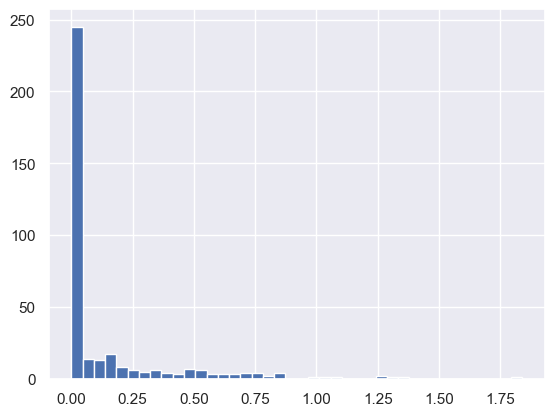

In [7]:
# Plot histogram
plt.hist(inches,40);

In [8]:
# Numpy's comparison operators with ufuncs
x = np.array([1,2,3,4,5])

In [9]:
# Less than operation
x < 3

array([ True,  True, False, False, False])

In [10]:
# dtype of output
print(x < 3)

[ True  True False False False]


In [11]:
# Greater than operation
x > 3

array([False, False, False,  True,  True])

In [12]:
# Less than or equal to
x <= 3

array([ True,  True,  True, False, False])

In [13]:
# GReater than or equal to
x >= 3

array([False, False,  True,  True,  True])

In [14]:
# Not equal to 
x != 3

array([ True,  True, False,  True,  True])

In [15]:
# Equality to 3
x == 3

array([False, False,  True, False, False])

In [16]:
# Element by element comparisons of two arrays and to include compound expressions
2 * x == x ** 2

array([False,  True, False, False, False])

In [17]:
# Two Dimensional Example
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [18]:
# Perform comparison operation on two dimensional array
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

<h3>Working with Boolean Arrays</h3>

In [19]:
# Two dimensional array we created is
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


<h4>Counting Entries</h4>

In [20]:
# To count the number of True entries, the function we can use is np.count_nonzero
np.count_nonzero(x < 6)

8

In [21]:
# Another way to get at this information is to use np.sum in which case False is interpreted as 0
# and True is interpreted as 1. 
np.sum(x < 6)

8

In [22]:
# The benefit of sum() is that it can be done along rows or columns as well:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [23]:
# If we are interested in checking whether any or all values are true, we can use np.any() or np.all()
# Are there any values greater than 8?
np.any(x > 8)

True

In [24]:
# Are there any values less than 0?
np.any(x < 0)

False

In [25]:
# Are all values less than 10?
np.all(x < 10)

True

In [26]:
# Are all values equal to 6?
np.all(x == 6)

False

In [27]:
# np.all() and np.any() can be used along particular axes as well?
# Are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

<h4>Boolean Operators</h4>

In [28]:
# rainfall less than 1 inches and greater than 0.5 inch
np.sum((inches > 0.5) & (inches < 1))

29

In [29]:
# Same result can be computed in an different manner as:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

In [32]:
# Combining comparsions operators and Boolean operators on arrays can lead to a wide range
# of efficient logical operations

# & - np.bitwise_and
# | - np.bitwise_or
# ^ - np.bitwise_xor
# ~ - np.bitwise_not

print("Number of days without rain      =", np.sum(inches == 0))
print("Number of days with rain         =", np.sum(inches != 0))
print("Number of with more than 0.5 in  =", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches     =", np.sum((inches > 0) & (inches < 0.2)))

Number of days without rain      = 215
Number of days with rain         = 150
Number of with more than 0.5 in  = 37
Rainy days with < 0.1 inches     = 75


<h4>Boolean Arrays as masks</h4>

In [31]:
# A powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. 
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [33]:
# Compare to less than 5
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [34]:
# Masking Operation: Select these values from the array , we can index the Boolean array. Process of indexing
# is known as Masking. 
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [37]:
# Construct a mask of all rainy days
rainy = (inches > 0)
rainy

array([False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,

In [39]:
# Construct a mask of all summer days
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print(f"Median precip on rainy days in 2014 in inches is {np.median(inches[rainy])}")
print(f"Median precip on summer days in 2014 in inches is {np.median(inches[summer])}")
print(f"Maximum precip on summer days in 2014 in inches is {np.max(inches[summer])}")
print(f"Median precip on non-summer days in 2014 in inches is {np.median(inches[rainy & ~summer])}")

Median precip on rainy days in 2014 in inches is 0.19488188976377951
Median precip on summer days in 2014 in inches is 0.0
Maximum precip on summer days in 2014 in inches is 0.8503937007874016
Median precip on non-summer days in 2014 in inches is 0.20078740157480315


In [40]:
# In Python all nonzero integers will evaluate as True
bool(42), bool(0)

(True, False)

In [41]:
bool(42 and 0)

False

In [42]:
bool(42 or 0)

True

In [43]:
# When you use & and | on integers, the expression operates on the bits of the element , applyin the and and or 
# the or to the individual bits making up the number:
bin(42)

'0b101010'

In [44]:
bin(59)

'0b111011'

In [45]:
bin(42 & 59)

'0b101010'

In [46]:
bin(42 | 59)

'0b111011'

In [47]:
# Another example
A = np.array([1,0,1,0,1,0], dtype=bool)
B = np.array([1,1,1,0,1,1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [48]:
# Using or on these arrays will try to evaluate the truth or falsehood of the entire array object
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [49]:
# When doing a Boolean expression on a given array, you should use | or & rather than or or and:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [50]:
# Trying to evaluate the truth or falsehood of the entire array will give value error
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()